# Transformada de Fourier

A transformada de Fourier pode ser usada para editar imagens. Usaremos o OpenCV para isso.

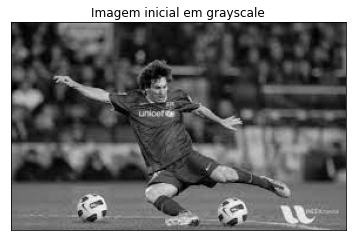

In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

img = cv.imread('images/messi.jpg',0)

plt.imshow(img, cmap = 'gray')
plt.title('Imagem inicial em grayscale'), plt.xticks([]), plt.yticks([])
plt.show()

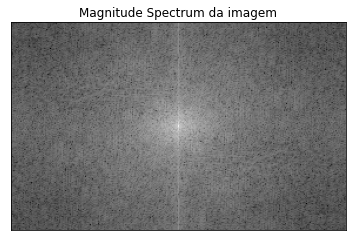

In [2]:
dft = cv.dft(np.float32(img),flags = cv.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
magnitude_spectrum = 20*np.log(cv.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))

plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum da imagem'), plt.xticks([]), plt.yticks([])
plt.show()

Aplicaremos um LFP ()

In [3]:
rows, cols = img.shape
crow,ccol = rows/2 , cols/2

# create a mask first, center square is 1, remaining all zeros
mask = np.zeros((rows,cols,2),np.uint8)
mask[int(crow)-30:int(crow)+30, int(ccol)-30:int(ccol)+30] = 1

# apply mask and inverse DFT
fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv.idft(f_ishift)
img_back = cv.magnitude(img_back[:,:,0],img_back[:,:,1])

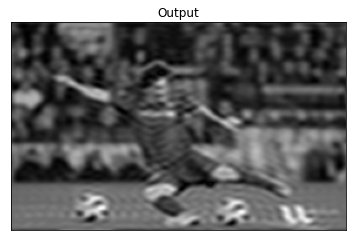

In [11]:
plt.imshow(img_back, cmap = 'gray')
plt.title('Output'), plt.xticks([]), plt.yticks([])
plt.show()

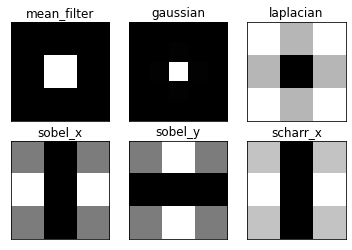

In [12]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
# simple averaging filter without scaling parameter
mean_filter = np.ones((3,3))
# creating a gaussian filter
x = cv.getGaussianKernel(5,10)
gaussian = x*x.T
# different edge detecting filters
# scharr in x-direction
scharr = np.array([[-3, 0, 3],
                   [-10,0,10],
                   [-3, 0, 3]])
# sobel in x direction
sobel_x= np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]])
# sobel in y direction
sobel_y= np.array([[-1,-2,-1],
                   [0, 0, 0],
                   [1, 2, 1]])
# laplacian
laplacian=np.array([[0, 1, 0],
                    [1,-4, 1],
                    [0, 1, 0]])
filters = [mean_filter, gaussian, laplacian, sobel_x, sobel_y, scharr]
filter_name = ['mean_filter', 'gaussian','laplacian', 'sobel_x', \
                'sobel_y', 'scharr_x']
fft_filters = [np.fft.fft2(x) for x in filters]
fft_shift = [np.fft.fftshift(y) for y in fft_filters]
mag_spectrum = [np.log(np.abs(z)+1) for z in fft_shift]
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(mag_spectrum[i],cmap = 'gray')
    plt.title(filter_name[i]), plt.xticks([]), plt.yticks([])
plt.show()